#### DSC630 Predictive Data Analytics
#### Swapnil Chavan
#### Week 8
#### Mentor : Prof. Neugebauer

#### Problem: 

You will be using the dataset us_retail_sales.csv for this assignment. This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:

* Plot the data with proper labeling and make some observations on the graph.
* Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
* Use the training set to build a predictive model for the monthly retail sales.
* Use the model to predict the monthly retail sales on the last year of data.
* Report the RMSE of the model predictions on the test set.

#### Solution

To begin with, I will import the libraries as and when needed. Importing pandas, matplotlib and numpy

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read the dataset using pandas

In [5]:
df = pd.read_csv('us_retail_sales.csv')

Let's have a look at the data first

In [6]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


##### 1. Plot the data with proper labeling and make some observations on the graph.

I have already imported matplotlib, I will utlize the same to plot the data.

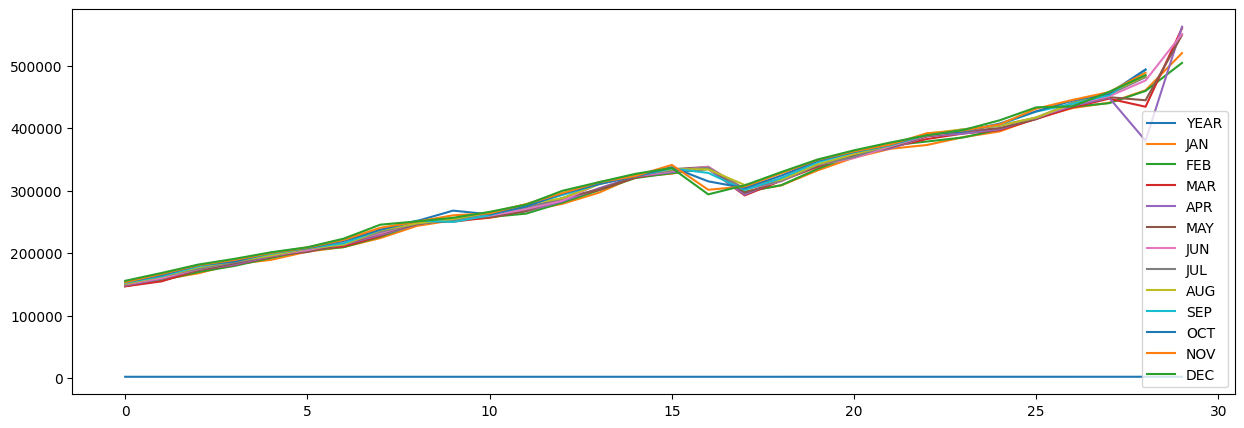

In [10]:
df.plot(figsize=(15,5))
plt.show()

Obsertaions: 
* I can see the upward trend in every month's data.
* there seems some spike at the end which is recent year and months.
* all the sames went down around sametime

##### 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

for this, I will import test_train_split from sklearn model selection package.

In [11]:
from sklearn.model_selection import train_test_split

Let me proceed with this split, but before that I want to deal with the missing values. To avoid a negative impact on my model, I will prefer replacing the null values with the mean of the column.

In [12]:
df = df.fillna(df.mean())

In [13]:
X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]
X_test = df.iloc[-12:, :-1]
y_test = df.iloc[-12:, -1]

##### 3. Use the training set to build a predictive model for the monthly retail sales.

To accomplish this, I will use linear regression. For that I will import linearRegression package

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

##### 4. Use the model to predict the monthly retail sales on the last year of data.

Predicting the sales

In [17]:
y_pred = lr_model.predict(X_test)

##### 5. Report the RMSE of the model predictions on the test set.

RMSE, which stands for Root Mean Square Error, is a statistical metric used to measure the accuracy of a model's predictions by calculating the average magnitude of the difference between predicted values and actual values; essentially, it tells you how far, on average, your model's predictions are from the true values, with a lower RMSE indicating a more accurate model.

To perform this step, I need to import mean_squared_error

from sklearn.metrics import mean_squared_error

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

3180.658250219427


In the sales over 200k, the RMSE of 3k is fairly low. This signifies that the model is highly accurate.